Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


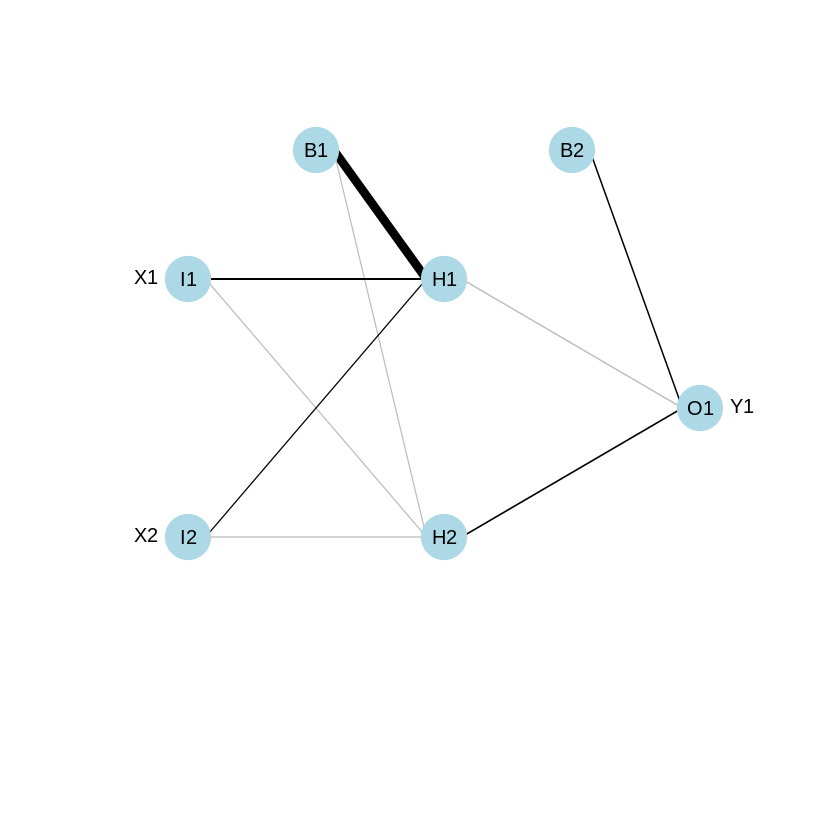

# weights:  26
initial  value 259,012592 
iter  10 value 0,986480
iter  20 value 0,225311
iter  30 value 0,139585
iter  40 value 0,098961
iter  50 value 0,038200
iter  60 value 0,022839
iter  70 value 0,013774
iter  80 value 0,008530
iter  90 value 0,005172
iter 100 value 0,003044
final  value 0,003044 
stopped after 100 iterations


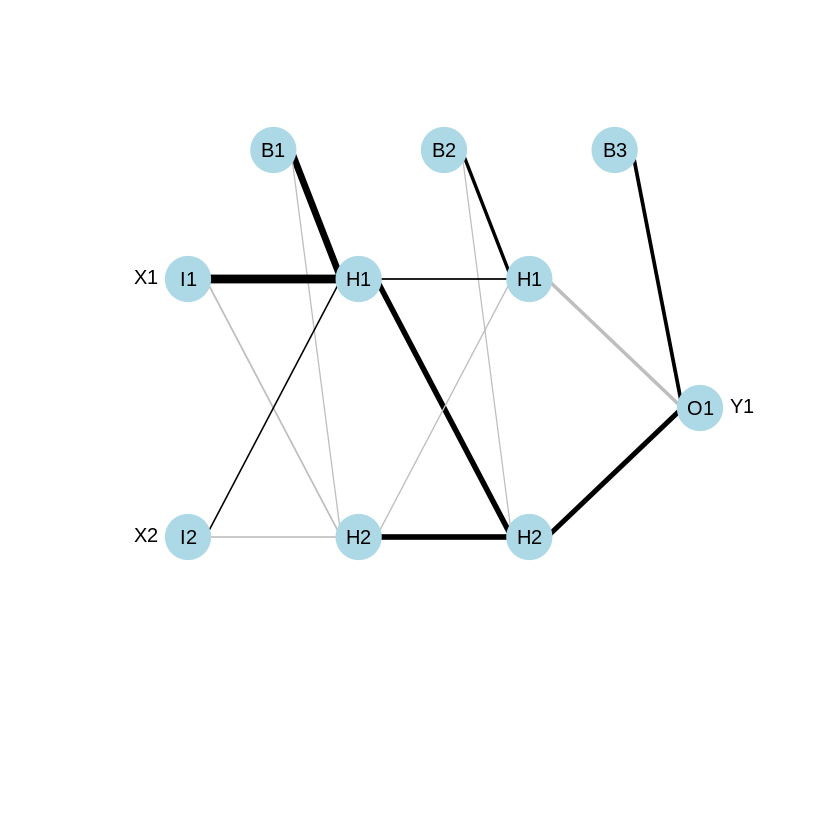

# weights:  29
initial  value 91,886893 
iter  10 value 0,302027
iter  20 value 0,028424
iter  30 value 0,021294
iter  40 value 0,019159
iter  50 value 0,017492
iter  60 value 0,016319
iter  70 value 0,015259
iter  80 value 0,013234
iter  90 value 0,011249
iter 100 value 0,006222
final  value 0,006222 
stopped after 100 iterations


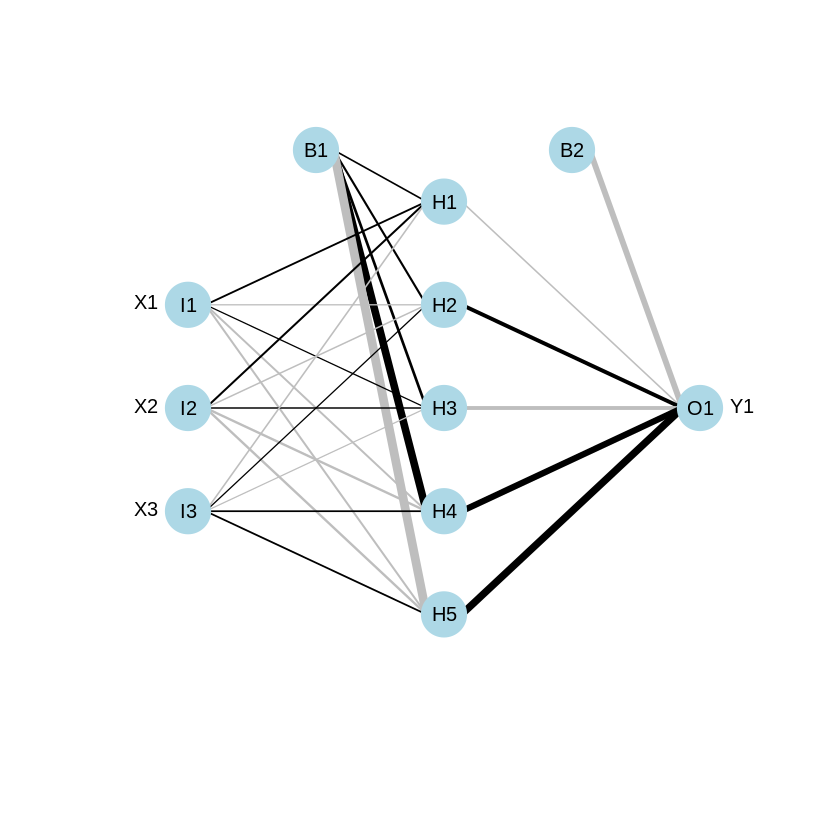

NULL

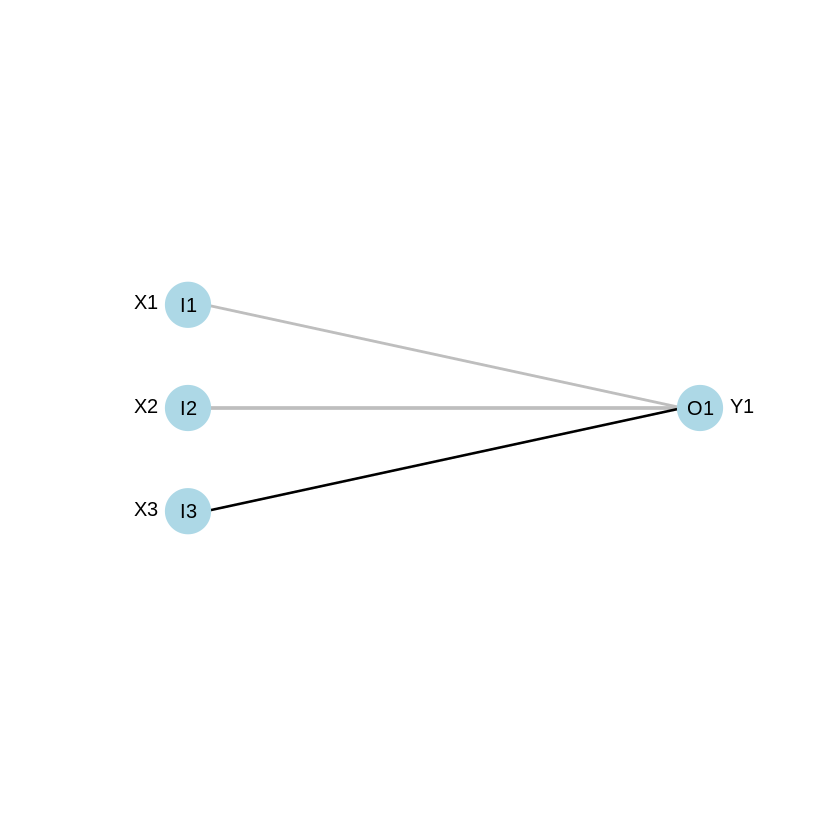

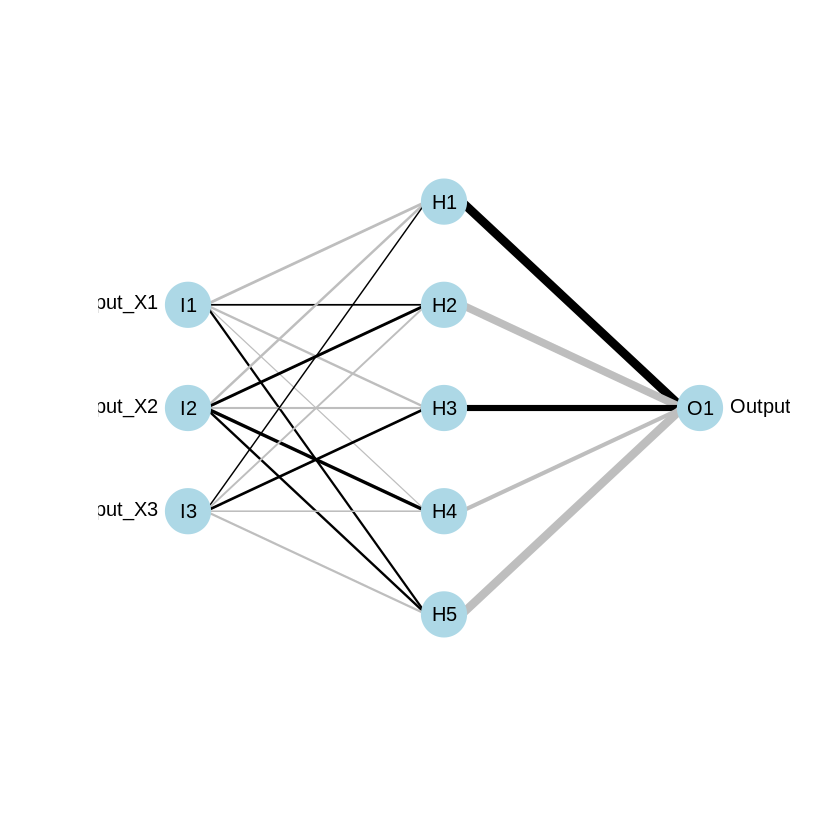

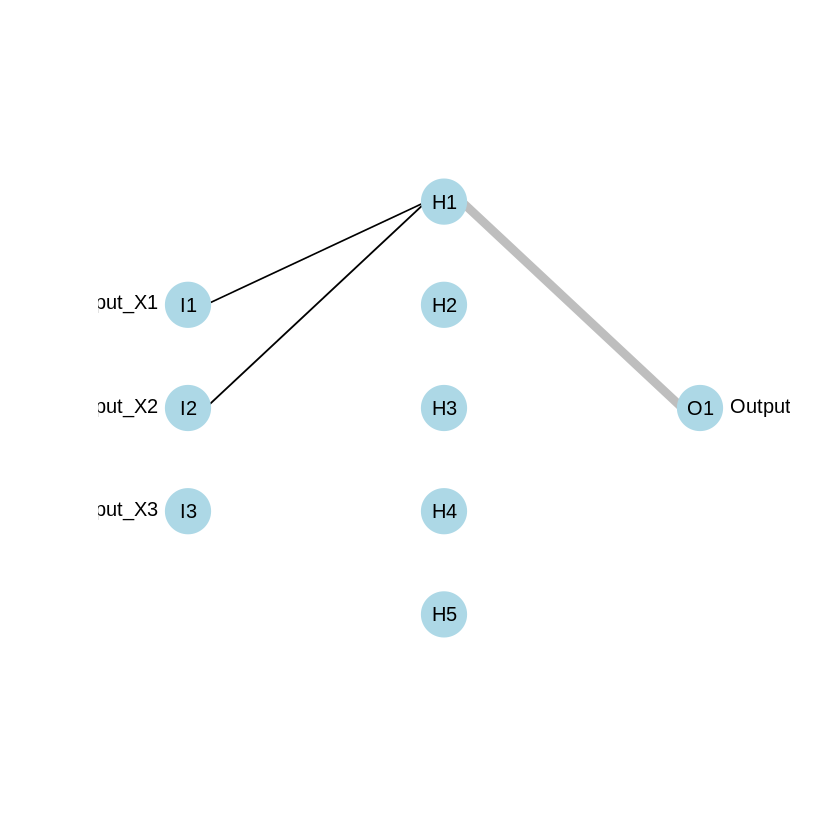

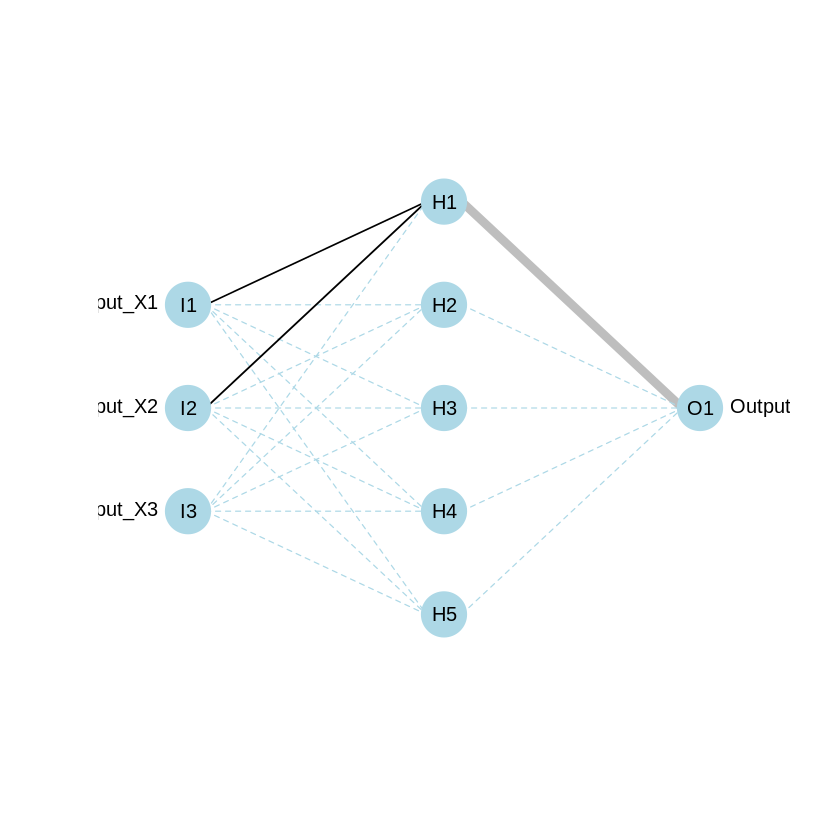

# weights:  6
initial  value 1068,143847 
iter  10 value 0,681506
iter  20 value 0,275273
iter  30 value 0,052822
iter  40 value 0,023020
iter  50 value 0,009924
iter  60 value 0,005995
iter  70 value 0,003561
iter  80 value 0,002394
iter  90 value 0,001939
iter 100 value 0,001610
final  value 0,001610 
stopped after 100 iterations
# weights:  16
initial  value 375,574440 
iter  10 value 6,568605
iter  20 value 0,303471
iter  30 value 0,039381
iter  40 value 0,018063
iter  50 value 0,001051
iter  60 value 0,000253
iter  70 value 0,000168
final  value 0,000092 
converged
# weights:  26
initial  value 566,745862 
iter  10 value 0,872449
iter  20 value 0,077744
iter  30 value 0,018597
iter  40 value 0,004508
iter  50 value 0,001470
iter  60 value 0,001088
iter  70 value 0,000334
iter  80 value 0,000145
final  value 0,000077 
converged
# weights:  6
initial  value 902,648966 
iter  10 value 30,900063
iter  20 value 5,829738
iter  30 value 0,641420
iter  40 value 0,320467
iter  50 value 0,2

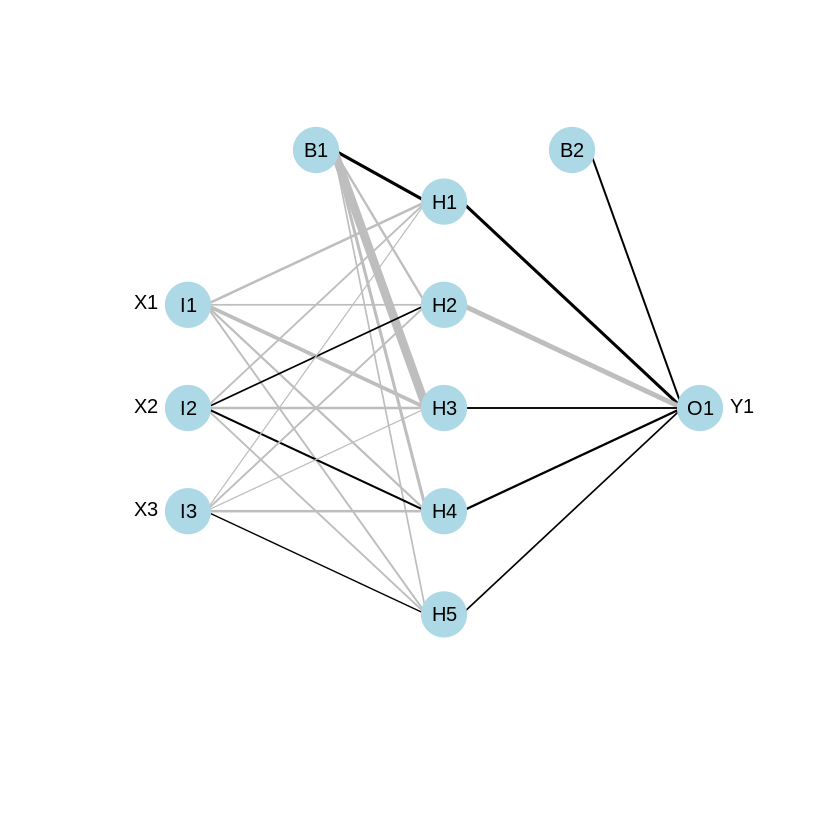

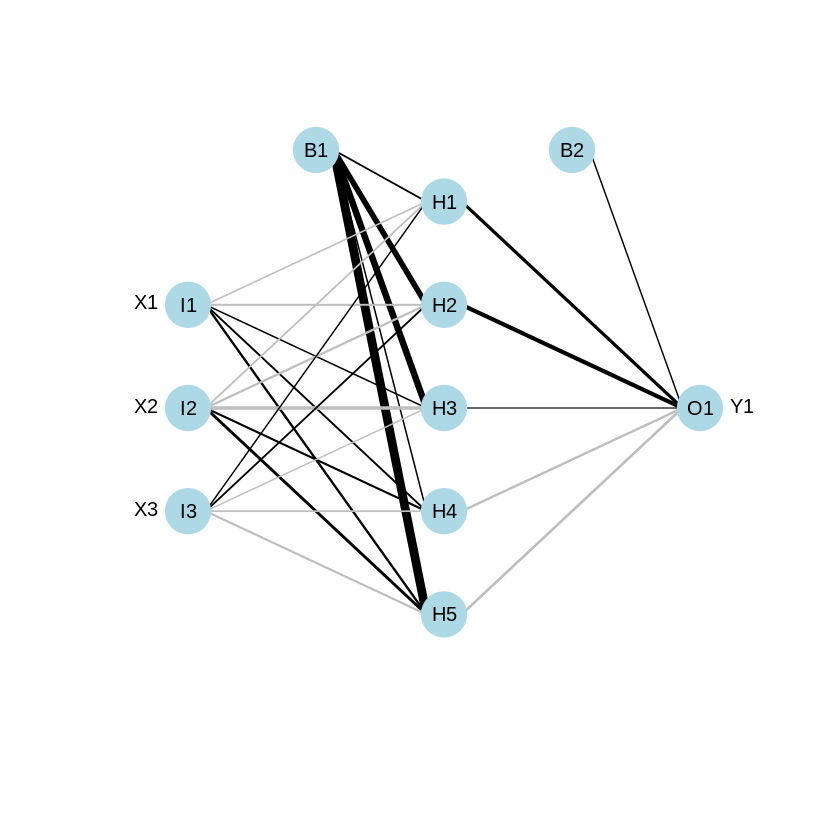

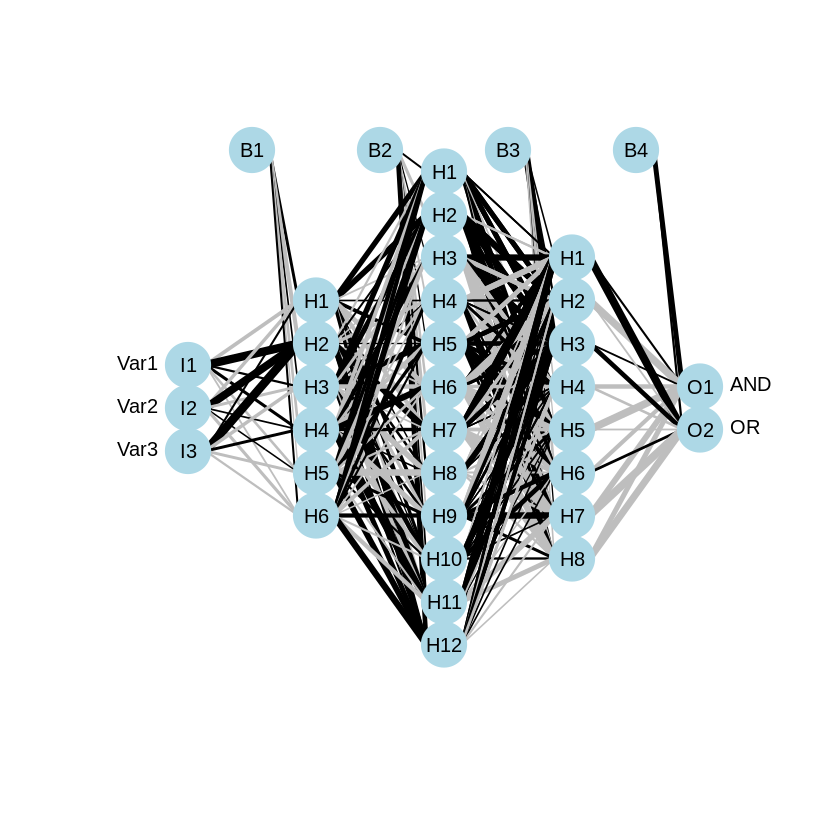

# weights:  26
initial  value 39,236447 
iter  10 value 0,473011
iter  20 value 0,226995
iter  30 value 0,171193
iter  40 value 0,142217
iter  50 value 0,068690
iter  60 value 0,021598
iter  70 value 0,010474
iter  80 value 0,009391
iter  90 value 0,008330
iter 100 value 0,007309
final  value 0,007309 
stopped after 100 iterations


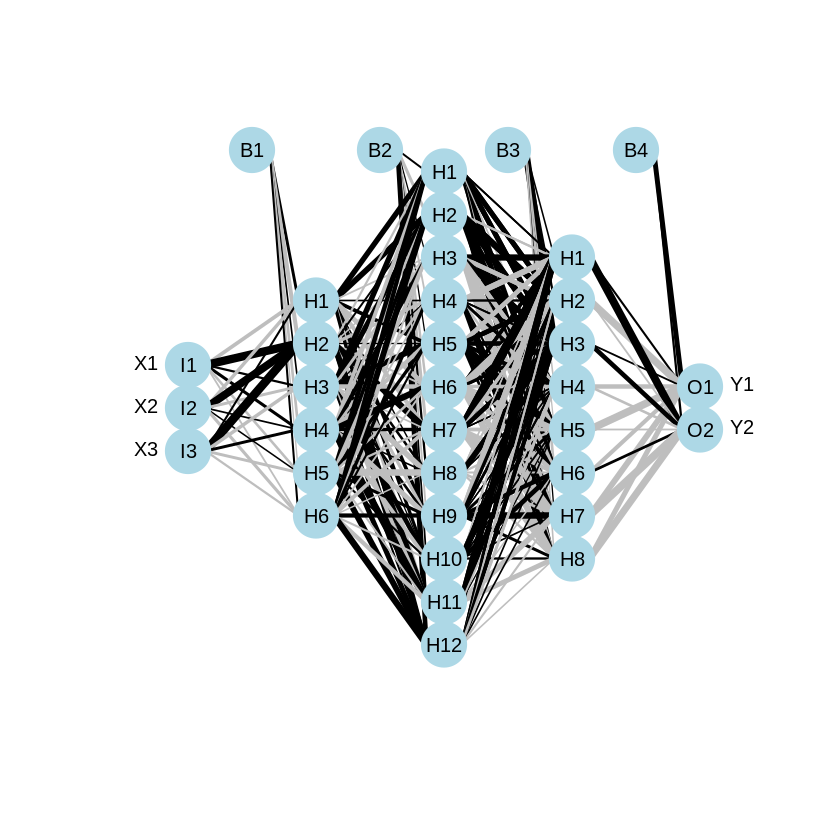

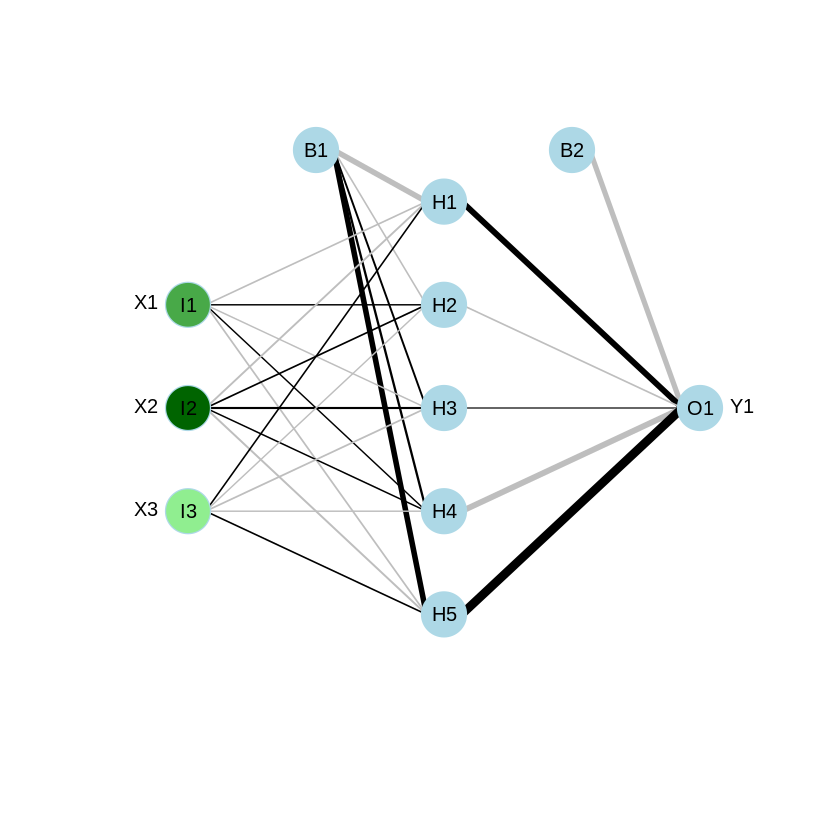

In [3]:

install.packages("RSNNS")
install.packages("Rcpp")

library(NeuralNetTools)

## using numeric input

# B1-H1, I1-H1, I2-H1, B1-H2, I1-H2, I2-H2, B2-O1, H1-O1, H2-O1.
wts_in <- c(13.12, 1.49, 0.16, -0.11, -0.19, -0.16, 0.56, -0.52, 0.81)
struct <- c(2, 2, 1) #two inputs, two hidden, one output 

plotnet(wts_in, struct = struct)

# numeric input, two hidden layers

# B1-H11, I1-H11, I2-H11, B1-H12, I1-H12, I2-H12, B2-H21, H11-H21, H12-H21, 
# B2-H22, H11-H22, H12-H22, B3-O1, H21-O1, H22-O1 
wts_in <- c(1.12, 1.49, 0.16, -0.11, -0.19, -0.16, 0.5, 0.2, -0.12, -0.1, 
 0.89, 0.9, 0.56, -0.52, 0.81)
struct <- c(2, 2, 2, 1) # two inputs, two (two nodes each), one output 

plotnet(wts_in, struct = struct)

## using nnet

library(nnet)

data(neuraldat) 
set.seed(123)

mod <- nnet(Y1 ~ X1 + X2 + X3, data = neuraldat, size = 5)
 
plotnet(mod)  

## plot the skip layer from nnet model

mod <- nnet(Y1 ~ X1 + X2 + X3, data = neuraldat, size = 5, skip = TRUE)

plotnet(mod, skip = TRUE)  

## Not run: 
## using RSNNS, no bias layers

library(RSNNS)

x <- neuraldat[, c('X1', 'X2', 'X3')]
y <- neuraldat[, 'Y1']
mod <- mlp(x, y, size = 5)

plotnet(mod)

# pruned model using code from RSSNS pruning demo
pruneFuncParams <- list(max_pr_error_increase = 10.0, pr_accepted_error = 1.0, 
 no_of_pr_retrain_cycles = 1000, min_error_to_stop = 0.01, init_matrix_value = 1e-6, 
 input_pruning = TRUE, hidden_pruning = TRUE)
mod <- mlp(x, y, size = 5, pruneFunc = "OptimalBrainSurgeon", 
 pruneFuncParams = pruneFuncParams)

plotnet(mod)
plotnet(mod, prune_col = 'lightblue')

## using neuralnet

library(neuralnet)

mod <- neuralnet(Y1 ~ X1 + X2 + X3, data = neuraldat, hidden = 5)

plotnet(mod)

## using caret

library(caret)

mod <- train(Y1 ~ X1 + X2 + X3, method = 'nnet', data = neuraldat, linout = TRUE)

plotnet(mod)

## a more complicated network with categorical response
AND <- c(rep(0, 7), 1)
OR <- c(0, rep(1, 7))
 
binary_data <- data.frame(expand.grid(c(0, 1), c(0, 1), c(0, 1)), AND, OR)
 
mod <- neuralnet(AND + OR ~ Var1 + Var2 + Var3, binary_data, 
 hidden = c(6, 12, 8), rep = 10, err.fct = 'ce', linear.output = FALSE)
 
plotnet(mod)

## recreate the previous example with numeric inputs

# get the weights and structure in the right format
wts <- neuralweights(mod)
struct <- wts$struct
wts <- unlist(wts$wts)

# plot
plotnet(wts, struct = struct)

## color input nodes by relative importance
mod <- nnet(Y1 ~ X1 + X2 + X3, data = neuraldat, size = 5)
 
rel_imp <- garson(mod, bar_plot = FALSE)$rel_imp
cols <- colorRampPalette(c('lightgreen', 'darkgreen'))(3)[rank(rel_imp)]
 
plotnet(mod, circle_col = list(cols, 'lightblue'))

## End(Not run)